In [ ]:
import tensorflow as tf
tf.__version__

'2.8.0'

데이터 증강시키고 훈련해보기

In [ ]:
import os, shutil
import matplotlib.pyplot as plt
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import models

In [ ]:
# 원본 데이터셋 디렉터리 경로
original_dataset_dir = './mydataset'
# 분할 데이터셋을 저장할 디렉터리
base_dir = './myaugeddatase/'
if os.path.exists(base_dir):
    shutil.rmtree(base_dir)
os.mkdir(base_dir)

In [ ]:


# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

# 훈련용 디렉터리
for i in range(10):
    globals()['train_dir_{}'.format(i)] = os.path.join(train_dir, str(i))
    os.mkdir(globals()['train_dir_{}'.format(i)])

# 10개씩 train_dir에 복사
for i in range(10):
    fnames = [str(i)+'-{}.jpg'.format(j+1) for j in range(10)]
    for fname in fnames:
        src = os.path.join(original_dataset_dir, fname)
        dst = os.path.join(globals()['train_dir_{}'.format(i)], fname)
        shutil.copyfile(src, dst)

In [ ]:
os.getcwd()

'/content'

In [ ]:
os.chdir('/content/drive/MyDrive/Colab Notebooks/2022-DL/')

In [ ]:
def invert(image):
    new_img = 255 - image
    return new_img

train_datagen = ImageDataGenerator(rescale=1./255, 
                                   width_shift_range=7,
                                   height_shift_range=7,
                                   rotation_range=30,
                                   zoom_range=0.3,
                                   fill_mode='nearest',
                                   preprocessing_function=invert)

train_generator = train_datagen.flow_from_directory(
        original_dataset_dir,
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=3,
        class_mode='categorical')


Found 303 images belonging to 10 classes.


label: [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


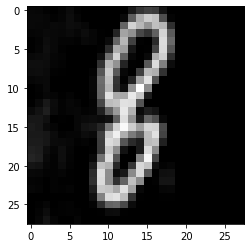

label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


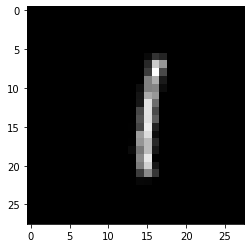

label: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


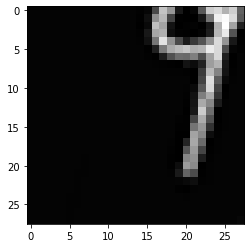

In [ ]:
x_train, y_train = train_generator.next()
for i in range(3):
  print('label:', y_train[i])
  im = np.squeeze(x_train[i])
  plt.imshow(im, cmap='gray')
  plt.show()


In [ ]:
datagen = ImageDataGenerator(rescale=1./255, rotation_range=30, preprocessing_function=invert)

data_generator = datagen.flow_from_directory(
        original_dataset_dir,
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=10,
        class_mode='categorical')


Found 303 images belonging to 10 classes.


In [ ]:
datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, preprocessing_function=invert)

data_generator = datagen.flow_from_directory(
        original_dataset_dir,
        target_size=(28, 28),
        color_mode='grayscale',
        batch_size=3,
        class_mode='categorical')

Found 303 images belonging to 10 classes.


label: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


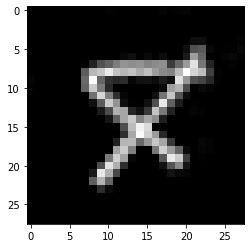

label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


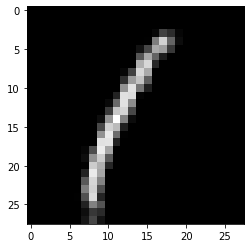

label: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


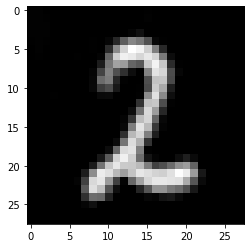

label: [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


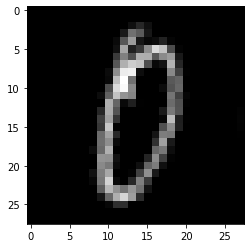

label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


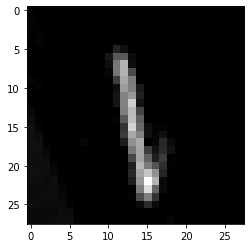

In [ ]:
x_train, y_train = data_generator.next()
for i in range(5):
  print('label:', y_train[i])
  im = np.squeeze(x_train[i])
  plt.imshow(im, cmap='gray')
  plt.show()

In [ ]:
# 모델 구성

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=15)

Epoch 1/15
100/100 [==============================] - 1s 8ms/step - loss: 2.3110 - accuracy: 0.0767
Epoch 2/15
100/100 [==============================] - 1s 8ms/step - loss: 2.3028 - accuracy: 0.0967
Epoch 3/15
100/100 [==============================] - 1s 8ms/step - loss: 2.2839 - accuracy: 0.1367
Epoch 4/15
100/100 [==============================] - 1s 8ms/step - loss: 2.1213 - accuracy: 0.2433
Epoch 5/15
100/100 [==============================] - 1s 8ms/step - loss: 2.0085 - accuracy: 0.2633
Epoch 6/15
100/100 [==============================] - 1s 8ms/step - loss: 1.9464 - accuracy: 0.3233
Epoch 7/15
100/100 [==============================] - 1s 8ms/step - loss: 1.8952 - accuracy: 0.3500
Epoch 8/15
100/100 [==============================] - 1s 8ms/step - loss: 1.7139 - accuracy: 0.4233
Epoch 9/15
100/100 [==============================] - 1s 8ms/step - loss: 1.7596 - accuracy: 0.3967
Epoch 10/15
100/100 [==============================] - 1s 8ms/step - loss: 1.5582 - accuracy: 0.4667

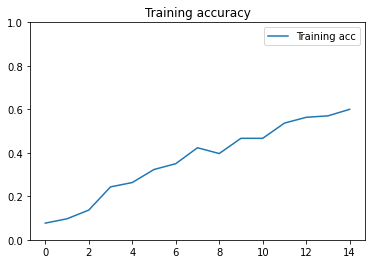

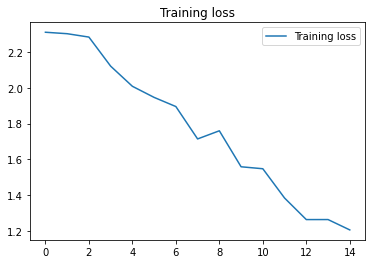

In [ ]:

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))
plt.ylim([0, 1.0])
plt.plot(epochs, acc, '-', label='Training acc')
plt.title('Training accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, '-', label='Training loss')
plt.title('Training loss')
plt.legend()

plt.show()